In [200]:
import numpy as np
import numpy as np
import commpy as cp
import scipy.signal as sig
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
# Function to zero force equalize. 
def zfEqualize(channel_output, channel):
    # make sure have same fft length 
    # we get the correct number of terms as this is like a circular convolution so the last packet is garbage
    freq_domain = np.fft.fft(channel_output, len(channel_output))/np.fft.fft(channel, len(channel_output))
    return np.fft.ifft(freq_domain)[0:len(channel_output) - len(channel) + 1]

# Count number of symbols that are off
def numFalses(inbits, equalized_constellation, QAMModem):
    outbits = QAMModem.demodulate(equalized_constellation, "hard")
    total = 0
    for i in range(len(inbits)):
        if inbits[i] != outbits[i]:
            total += 1
    return total

# Adds complex gaussian noise to inputted signal 
def addNoise(input_signal, noise_amp):   
    n = len(input_signal)
    noise = noise_amp*np.random.randn(2*n)
    noisy_array = []
    for i in range(len(input_signal)):
        # used to construct complex noise with gaussian rv on both real and imag terms
        noisy_array.append(input_signal[i] + noise[i] + noise[i+1]*1j)
    return noisy_array

# Generate data samples run them through a channel then equalize using zero force equalizer and return symbol error rate
def find_SER(channel_len, noise_amp, runs = 1000, num_bits = 4 ):
    # make modulator and message size
    QAMModem = cp.modulation.QAMModem(c)
    constellation = 4
    n = constellation * num_bits
    sym_errors = 0 

    for i in range(runs):
        # generate input bits and constellation
        input_bits = np.random.randint(0,2,n) 
        input_constellation = QAMModem.modulate(input_bits)
        # pass signal through random channel
        channel_function= np.random.randn(channel_len)
        channel_output = sig.convolve(input_constellation, channel_function, mode="full")
        channel_output = addNoise(channel_output, noise_amp)
        # equalize, demodulate and calculate the symbol error rate
        eqd = zfEqualize(channel_output, channel_function)
        falses = numFalses(input_bits, eqd, QAMModem)
        sym_errors += falses
    sym_error_rate = sym_errors/(n*runs)
    return sym_error_rate

In [207]:
# Calculate the symbol error rate for different noise magnitudes
noise_mag_errs = []
for i in np.arange(0, 1, 0.02):
    noise_mag_errs.append(find_SER(2, i))

In [208]:
# Calculate the symbol error rate for different channel lengths for fixed noise magnitude = 0.4
channel_mag_errs = []
for i in np.arange(2, 20):
    channel_mag_errs.append(find_SER(i, 0.4))

[0.0, 0.000875, 0.0033125, 0.007875, 0.0085625, 0.0116875, 0.0125, 0.0195, 0.0231875, 0.0245625, 0.027625, 0.032875, 0.040125, 0.044, 0.0400625, 0.044125, 0.0565625, 0.0655, 0.0624375, 0.0725625, 0.071375, 0.076125, 0.083, 0.08575, 0.0885, 0.10625, 0.1055625, 0.10475, 0.11675, 0.112875, 0.117625, 0.1335625, 0.1361875, 0.140875, 0.1483125, 0.15, 0.1418125, 0.154375, 0.1573125, 0.15575, 0.1710625, 0.1756875, 0.1776875, 0.176375, 0.1899375, 0.1841875, 0.1901875, 0.209375, 0.193, 0.2025625] 


 [0.0655625, 0.072125, 0.0484375, 0.052125, 0.034375, 0.037125, 0.0265, 0.0325625, 0.025625, 0.0288125, 0.017625, 0.018125, 0.0116875, 0.0185, 0.01275, 0.01325, 0.0143125, 0.0165625] 



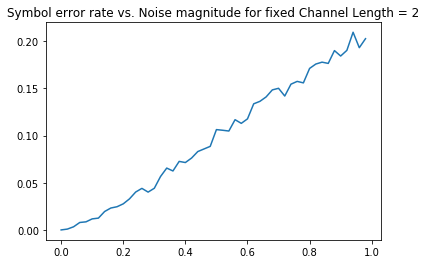

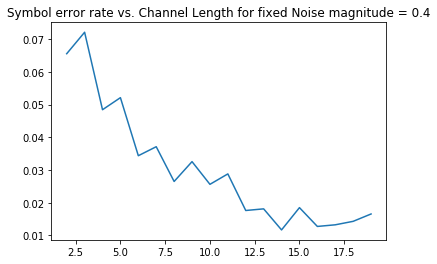

In [209]:
# Plot symbol error rate vs. noise magnitude and symbol error rate vs. channel length
print(noise_mag_errs, "\n")
plt.figure()
plt.title("Symbol error rate vs. Noise magnitude for fixed Channel Length = 2")
plt.plot(np.arange(0, 1, 0.02), noise_mag_errs)

print("\n", channel_mag_errs, "\n")
plt.figure()
plt.title("Symbol error rate vs. Channel Length for fixed Noise magnitude = 0.4")
plt.plot(np.arange(2,20), channel_mag_errs)